# Classifying Emotions

Using CNN model to classify positive, negative and neutral emotions based on EEG. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv('emotions.csv')

In [3]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


Notes from video: 

Treating this as time series data
Using a recurrent neural network



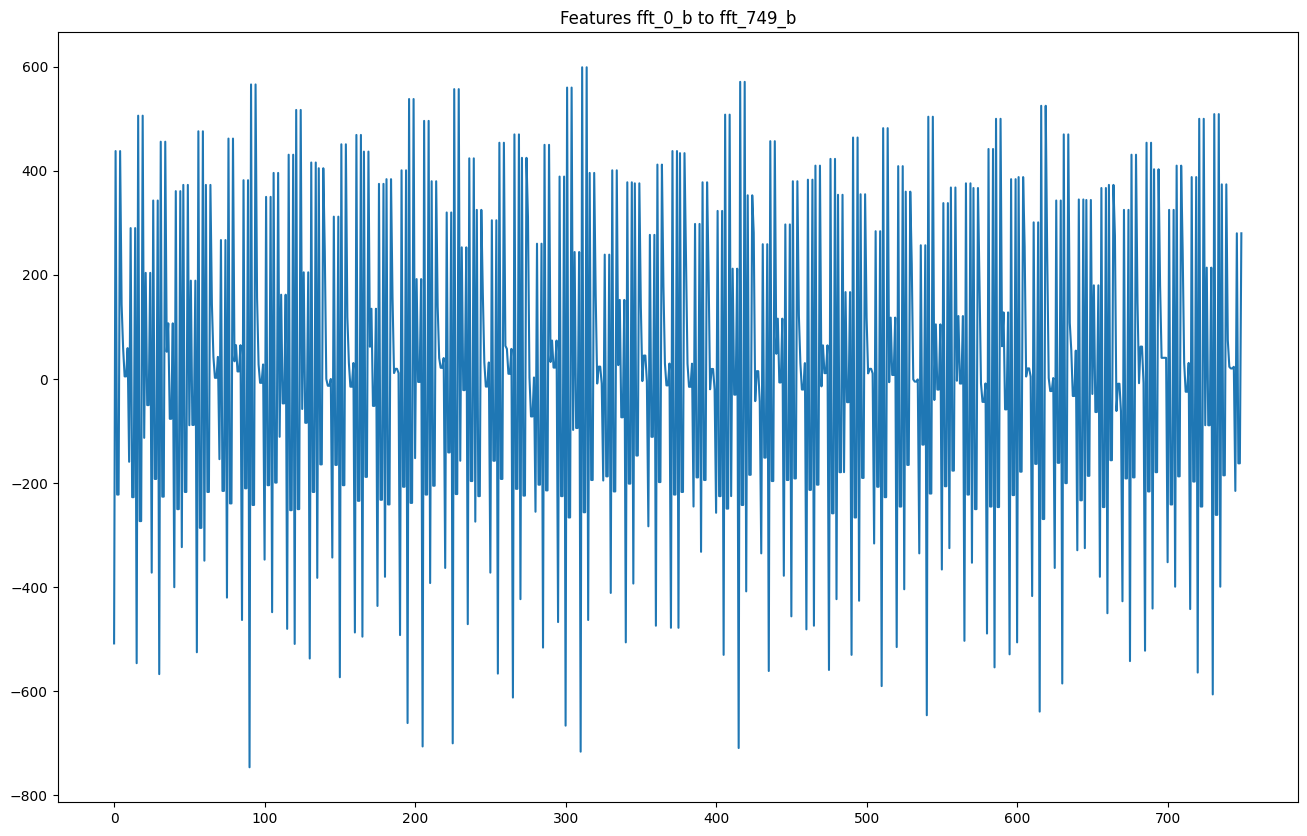

In [4]:
sample = df.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16,10))
plt.plot(range(len(sample)),sample)
plt.title("Features fft_0_b to fft_749_b")
plt.show()

Labels Counts label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


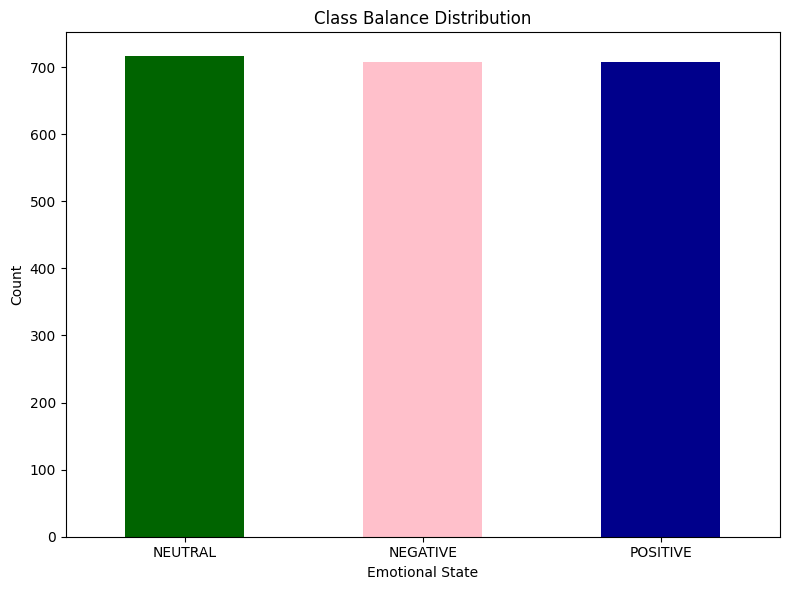

In [21]:
label_counts = df.loc[:,'label'].value_counts()
print("Labels Counts", label_counts)
plt.figure(figsize=(8, 6))  # Set the figure size
label_counts.plot(kind='bar', color=['darkgreen', 'pink', 'darkblue'])  # Set colors for each class
plt.title("Class Balance Distribution")
plt.xlabel("Emotional State")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [22]:
label_mapping = {'NEGATIVE':0, 'NEUTRAL':1 , 'POSITIVE':2}

## Preprocessing

In [23]:
def preprocessing(df):
    df = df.copy()
    df['label'] = df['label'].replace(label_mapping)

    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=123)

    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = preprocessing(df)
y_test

C:\Users\ghimi\AppData\Local\Temp\ipykernel_14728\2787129268.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(label_mapping)


1676    0
1074    0
1451    2
1134    1
912     0
       ..
316     2
1016    0
1209    0
36      2
1467    1
Name: label, Length: 640, dtype: int64